<a href="https://colab.research.google.com/github/HasinTaj/RUBBER-PROPERTIES-PREDICTION/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import os

file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB
print(f"File Size: {file_size:.2f} MB")


File Size: 0.93 MB


In [ ]:
import os
import pandas as pd
from google.colab import files

file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Check if the file exists before uploading
if not os.path.exists(file_path):
    print("File not found. Please upload it.")
    uploaded = files.upload()

# Verify the file exists after upload
if os.path.exists(file_path):
    print("File successfully uploaded!")
    # Load CSV efficiently
    df = pd.read_csv(file_path, low_memory=False)

    # Display basic information
    print(df.head())
    print(df.info(memory_usage="deep"))  # Shows detailed memory usage
else:
    print("File upload failed. Try again.")


File not found. Please upload it.


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
File successfully uploaded!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fib

In [ ]:
import os
file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB
print(f"File Size: {file_size:.2f} MB")


File Size: 0.93 MB


In [ ]:
df = pd.read_csv(file_path, nrows=1000)  # Load only 1000 rows


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload CSV file

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Replace with your filename
print(df.head())  # Display first 5 rows
print(df.info())  # Show dataset details
print(df.describe())  # Statistical summary


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No 

In [ ]:
# Reload dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", low_memory=False)

# Standardize column names
df.columns = df.columns.str.strip()

# Check column names
print("Columns in dataset:", df.columns)

# Use correct column name
if 'gender' in df.columns:
    print(df["gender"].head())  # Display first few values
else:
    print("Column 'gender' not found. Check dataset structure.")


Columns in dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object


In [ ]:
# Identify categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']

# Apply one-hot encoding to these categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())  # Check the transformed dataset


   customerID  SeniorCitizen  tenure PhoneService     MultipleLines  \
0  7590-VHVEG              0       1           No  No phone service   
1  5575-GNVDE              0      34          Yes                No   
2  3668-QPYBK              0       2          Yes                No   
3  7795-CFOCW              0      45           No  No phone service   
4  9237-HQITU              0       2          Yes                No   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  ...  \
0             No          Yes               No          No          No  ...   
1            Yes           No              Yes          No          No  ...   
2            Yes          Yes               No          No          No  ...   
3            Yes           No              Yes         Yes          No  ...   
4             No           No               No          No          No  ...   

  gender_Male Partner_Yes  Dependents_Yes InternetService_Fiber optic  \
0       False        True

In [ ]:
print(df.dtypes)


customerID                                object
SeniorCitizen                              int64
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                              object
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year   

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [ ]:
X = df.drop(columns=['Churn'])  # Drop the correct target column
y = df['Churn']  # Set target variable


In [ ]:
print(df.columns)  # List all column names


Index(['customerID', 'SeniorCitizen', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']


In [ ]:
# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Convert 'Churn' to numeric if it's categorical
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

print("Features and target extracted successfully!")


Features and target extracted successfully!


In [ ]:
print(X.dtypes)


customerID                                object
SeniorCitizen                              int64
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Remove non-numeric columns before scaling
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numeric

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature scaling applied successfully!")


Feature scaling applied successfully!


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(8, activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model

print(model.summary())  # Display model structure


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         113,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,313 (442.63 KB)

 Trainable params: 113,313 (442.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7184 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7288 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7295 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7288 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7446 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7425 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7292 - loss: nan - val_accuracy: 0.7353 - val_loss: nan
Epoch 9/50
177/177 ━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: nan
Test Accuracy: 73.53%


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

print(classification_report(y_test, y_pred))  # Print precision, recall, and F1-score


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


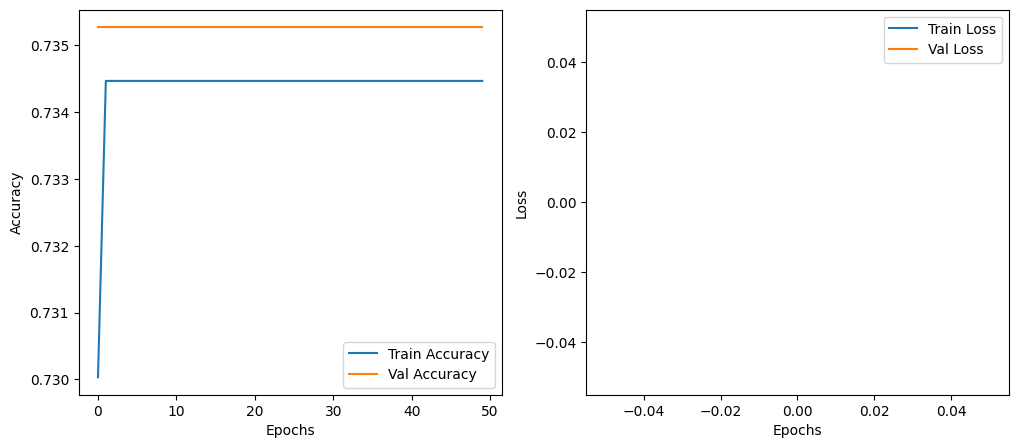

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
model.save("customer_churn_model.h5")  # Save the model


In [ ]:
loaded_model = keras.models.load_model("customer_churn_model.h5")
